# Project: Getting Started with Iterative Product Management

The boutique ice cream sandwich startup you've joined, IceCreamSandwi.ch, has gotten by on the personality of it's founder, I. Sandwich (real name?), for too long.  The last 2 quarters of features the team has launched to the website have not landed with customers.

You've decided it's time to step up, lay out a plan for how you're going to identify paths forward which are more likely to succeed than "whatever I. Sandich happened to promise a random person they met at a bar last night".  You pitch the team on an iterative design process which brings qualitative and quantitative techniques together in order to minimize industry standard risk types so that you can move forward confidently.

Someone in your company recently learned about a/b experiments - so they instrumented tracking and ran an experiment based on your founder's unfounded random idea.

Unsurprisingly - the results of the experiment seem to have flopped.  While the total effect isn't known it definitely wasn't a 10x experiment. 

But there's a bright side! 

The data scientist on your team now has some well structured event logs they can dig through in order to surface user personas and a journey.  You tell the team you'd like to collect all of the known assumptions before you launch the next experiment to the site so you have the best chance of success.  You tell the CEO and Board (wait - is it really just their friends from college and mom?) that at the end of your week long design sprint you're going to summarize what's known and propose a path forward which is iterative and gives you the best chance of moving the needle.  


Your CEO gives you the ok if you can help them show the largest possible impact in the shortest time possible.




<!--
%%ulab_page_divider
--><hr/>

## Submission Requirements

Find the Student Submission Starter Deck here (TKTK)

Take the analysis given to you and summarize the previous experiment, develop personas and a journey, and generate hypotheses and proposed next steps.

Section 1:   
1: Check to see if the previous a/b experiment was valid (95% confidence)  
2: Check if the experiment or control won by performing a chi-square test on outcomes and reporting on if the difference is signifcant.  

Section 2:   
1: Find the actionable attributes of your users upon which to build your personas  
2: Find the different stages of the user's journey  
3: Identify risks or opportunities for your team to address with hypotheses    

Section 3:   
1: Generate well formed hypotheses with clear next steps

<!--
%%ulab_page_divider
--><hr/>

## Offline Instructions

This notebook contains everything you need to complete your analysis and submit your final project.

In case you need to work offline here's what you need to do

1) Download this file and the Student Submission Starter Deck  
2) Complete your analysis in the Deck (or in your own version)  
3) Upload your presentation for evaluation   

<!--
%%ulab_page_divider
--><hr/>

## Section 1 - Evaluate previous a/b experiment

## Doing a quick analysis to explore the data from the previous experiment.  


1: Confirm the data is loaded  
2: Check to see if the previous a/b experiment was valid (95% confidence)  
3: Check if the experiment or control won by performing a chi-square test on outcomes and reporting on if the difference is signifcant.

In [2]:
import numpy as np
from scipy import stats
import pandas as pd
import glob
import datetime
import itertools

log_files = glob.glob(r'event_logs_part_*.csv')
df = pd.concat((pd.read_csv(f) for f in log_files)).drop(['Unnamed: 0'],axis=1)

In [3]:
df.describe()

,event_uuid,user_uuid,event_time,device_type,session_uuid,experiment_group,user_country,event_page,event_type
count,1252068,1252068,1252068,1252068,1252068,1252068,1252068,1252068,1252068
unique,1252068,81708,526433,4,227564,2,5,4,5
top,4a7a87cd-20d0-49b7-a97c-c5e590e6dd0c,2b74eece-a277-44f5-8199-680f522c5c21,2019-10-01 03:29:24,mobile_web,cb4a510d-75c4-4d1c-a941-be424e32db6e,control,US,item_page,view
freq,1,49,12,627052,10,627723,877653,500191,821287


In [4]:
## Get the number of sessions by experiment or control group
df.groupby('experiment_group').apply(lambda x: x['session_uuid'].nunique()).reset_index(name='count')

,experiment_group,count
0,control,113911
1,experiment,113653


In [5]:
## Ensure the experiment was split evenly between sessions

control_sessions = df.groupby('experiment_group').apply(lambda x: x['session_uuid'].nunique())['control']
experiment_sessions = df.groupby('experiment_group').apply(lambda x: x['session_uuid'].nunique())['experiment']


desired_p = 0.5  
z_score = 1.960  #z-score for 95% confidence range

total_control =  22725 #total number of sessions control
total_experiment = 22879 #total number of sessions experiment


standard_deviation = np.sqrt((0.5*0.5)/(total_control + total_experiment))
margin_error = standard_deviation * z_score

confidence_interval = (desired_p-margin_error, desired_p+margin_error)

p_hat = total_control / (total_control + total_experiment)

print("p_hat:\t\t", p_hat)
print("confidence int:\t", confidence_interval)
print("Continue analysis?:", p_hat > confidence_interval[0] and p_hat < confidence_interval[1])

p_hat:		 0.4983115516182791
confidence int:	 (0.49541093079380116, 0.50458906920619884)
Continue analysis?: True


In [6]:
## Get the number of purchases by experiment or control group
df.groupby('experiment_group')['event_type'].apply(lambda x: (x == 'purchase').sum()).reset_index(name='count')


,experiment_group,count
0,control,1957
1,experiment,1953


In [7]:
control_purchase = df.groupby('experiment_group')['event_type'].apply(lambda x: (x == 'purchase').sum())['control']
experiment_purchase = df.groupby('experiment_group')['event_type'].apply(lambda x: (x == 'purchase').sum())['experiment']


In [8]:
#S1_3
#chisuared test

#P-value here greater than .05 (our test for significance).  This result could be due to randomness

control_stats = [control_purchase, control_sessions - control_purchase]
experiment_stats = [experiment_purchase, experiment_sessions - experiment_purchase]
outcomes =  np.array([control_stats, experiment_stats])
stats.chi2_contingency(outcomes)

(8.3674337178373762e-05,
 0.99270155826395723,
 1,
 array([[   1957.21647537,  111953.78352463],
        [   1952.78352463,  111700.21647537]]))

## Section 2 - Develop Actionable Personas and Journey Steps

In [9]:
# Going back to the data
df.describe()

,event_uuid,user_uuid,event_time,device_type,session_uuid,experiment_group,user_country,event_page,event_type
count,1252068,1252068,1252068,1252068,1252068,1252068,1252068,1252068,1252068
unique,1252068,81708,526433,4,227564,2,5,4,5
top,4a7a87cd-20d0-49b7-a97c-c5e590e6dd0c,2b74eece-a277-44f5-8199-680f522c5c21,2019-10-01 03:29:24,mobile_web,cb4a510d-75c4-4d1c-a941-be424e32db6e,control,US,item_page,view
freq,1,49,12,627052,10,627723,877653,500191,821287


In [8]:

# Starting an Exploratory Analysis.  I want to look at the nnumber of unique device types and countries.
devices = df.device_type.unique()
countries = df.user_country.unique()

In [11]:
#Count of users by country
countries = df.groupby('user_country')['user_uuid'].nunique().reset_index(name='count')

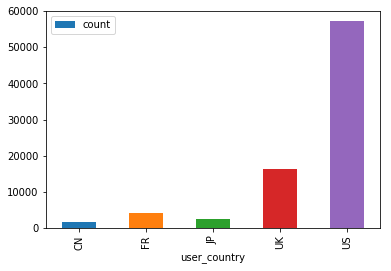

In [13]:
countries.plot(x='user_country', y='count', kind='bar')

In [46]:
#Count of devices by country
devices = df.groupby('device_type')['user_uuid'].nunique().reset_index(name='count')

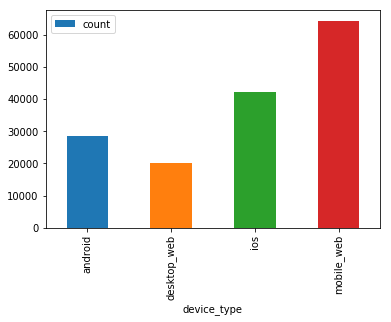

In [47]:
devices.plot(x='device_type', y='count', kind='bar')

In [14]:
#Count of users by country by device type
df.groupby(['device_type', 'user_country'])['user_uuid'].nunique()

device_type  user_country
android      CN                558
             FR               1425
             JP                846
             UK               5764
             US              20013
desktop_web  CN                361
             FR               1016
             JP                579
             UK               4030
             US              14064
ios          CN                801
             FR               2121
             JP               1280
             UK               8415
             US              29672
mobile_web   CN               1245
             FR               3285
             JP               1921
             UK              12850
             US              45058
Name: user_uuid, dtype: int64

In [15]:
#Rank of users by country by device type.  Higher is more users.
df.groupby(['device_type', 'user_country'])['user_uuid'].nunique().rank(method='dense')

device_type  user_country
android      CN               2.0
             FR               9.0
             JP               5.0
             UK              14.0
             US              18.0
desktop_web  CN               1.0
             FR               6.0
             JP               3.0
             UK              13.0
             US              17.0
ios          CN               4.0
             FR              11.0
             JP               8.0
             UK              15.0
             US              19.0
mobile_web   CN               7.0
             FR              12.0
             JP              10.0
             UK              16.0
             US              20.0
Name: user_uuid, dtype: float64

In [17]:
# Continuing an Exploratory Analysis.  I want to look at the event pages and event types captured.

pages = df.event_page.unique()
events = df.event_type.unique()

In [18]:
#Page type by number of events
df.groupby('event_page')['event_uuid'].nunique().reset_index(name='count')


,event_page,count
0,home_page,125385
1,item_page,500191
2,marketing_page,375753
3,search_page,250739


In [19]:
#Count of event types on any page
df.groupby('event_type')['event_uuid'].nunique().reset_index(name='count')




,event_type,count
0,cart,36709
1,favorite,194856
2,purchase,3910
3,share,195306
4,view,821287


In [20]:
#Count of sessions by event page by event type

df.groupby(['event_page', 'event_type'])['session_uuid'].nunique()



event_page      event_type
home_page       cart            3364
                favorite       17799
                purchase         328
                share          17772
                view           64938
item_page       cart           11140
                favorite       54707
                purchase        1275
                share          54942
                view          151295
marketing_page  cart            8940
                favorite       44487
                purchase        1046
                share          44807
                view          132963
search_page     cart            6314
                favorite       32559
                purchase         715
                share          32412
                view          106021
Name: session_uuid, dtype: int64

In [21]:
#Rank of sessions by event page by event type.  Higher is more sessions.

df.groupby(['event_page', 'event_type'])['session_uuid'].nunique().rank(method='dense')

event_page      event_type
home_page       cart           5.0
                favorite      10.0
                purchase       1.0
                share          9.0
                view          17.0
item_page       cart           8.0
                favorite      15.0
                purchase       4.0
                share         16.0
                view          20.0
marketing_page  cart           7.0
                favorite      13.0
                purchase       3.0
                share         14.0
                view          19.0
search_page     cart           6.0
                favorite      12.0
                purchase       2.0
                share         11.0
                view          18.0
Name: session_uuid, dtype: float64

In [52]:
# Conversion rate by Region

## It appears users in the US don't convert any differently from users in any other region.
## While we may expect that they have different behavior, it doesn't appear to be true.

purchase_by_region =  df.groupby('user_country')['event_type'].apply(lambda x: (x == 'purchase').sum()).reset_index(name='count')
session_by_region =   df.groupby('user_country')['session_uuid'].nunique().reset_index(name='count')


by_region_conversion = purchase_by_region.merge(session_by_region, on="user_country", suffixes=("_purchase", "_sessions") )

purch_CN = by_region_conversion.loc[ by_region_conversion['user_country'] == 'CN', 'count_purchase'].iloc[0]
purch_FR =  by_region_conversion.loc[ by_region_conversion['user_country'] == 'FR', 'count_purchase'].iloc[0] 
purch_JP =  by_region_conversion.loc[ by_region_conversion['user_country'] == 'JP', 'count_purchase'].iloc[0] 
purch_UK =  by_region_conversion.loc[ by_region_conversion['user_country'] == 'UK', 'count_purchase'].iloc[0] 
purch_US =  by_region_conversion.loc[ by_region_conversion['user_country'] == 'US', 'count_purchase'].iloc[0] 

sess_CN = by_region_conversion.loc[ by_region_conversion['user_country'] == 'CN', 'count_sessions'].iloc[0]
sess_FR =  by_region_conversion.loc[ by_region_conversion['user_country'] == 'FR', 'count_sessions'].iloc[0] 
sess_JP =  by_region_conversion.loc[ by_region_conversion['user_country'] == 'JP', 'count_sessions'].iloc[0] 
sess_UK =  by_region_conversion.loc[ by_region_conversion['user_country'] == 'UK', 'count_sessions'].iloc[0] 
sess_US =  by_region_conversion.loc[ by_region_conversion['user_country'] == 'US', 'count_sessions'].iloc[0]

purch_all_region = by_region_conversion['count_purchase'].sum()
sess_all_region  = by_region_conversion['count_sessions'].sum()

us_stats = [purch_US, sess_US - purch_US]
all_region_stats = [purch_all_region, sess_all_region - purch_all_region]
region_outcomes =  np.array([ all_region_stats, us_stats])
stats.chi2_contingency(region_outcomes)



(0.78973631940260369,
 0.37417986862285735,
 1,
 array([[   3946.01636857,  223617.98363143],
        [   2763.98363143,  156633.01636857]]))

In [25]:
# Conversion rate by Device

## Users on mobile web have a much worse conversion rate than users on any other platform.
## This is an area rife for hypothesis generation.


purchase_by_device =  df.groupby('device_type')['event_type'].apply(lambda x: (x == 'purchase').sum()).reset_index(name='count')
session_by_device =   df.groupby('device_type')['session_uuid'].nunique().reset_index(name='count')
by_device_conversion = purchase_by_device.merge(session_by_device, on="device_type", suffixes=("_purchase", "_sessions") )


purch_android = by_device_conversion.loc[ by_device_conversion['device_type'] == 'android', 'count_purchase'].iloc[0]
purch_web =  by_device_conversion.loc[ by_device_conversion['device_type'] == 'desktop_web', 'count_purchase'].iloc[0] 
purch_ios =  by_device_conversion.loc[ by_device_conversion['device_type'] == 'ios', 'count_purchase'].iloc[0] 
purch_mweb =  by_device_conversion.loc[ by_device_conversion['device_type'] == 'mobile_web', 'count_purchase'].iloc[0] 

sess_android = by_device_conversion.loc[ by_device_conversion['device_type'] == 'android', 'count_sessions'].iloc[0]
sess_web =  by_device_conversion.loc[ by_device_conversion['device_type'] == 'desktop_web', 'count_sessions'].iloc[0] 
sess_ios =  by_device_conversion.loc[ by_device_conversion['device_type'] == 'ios', 'count_sessions'].iloc[0] 
sess_mweb =  by_device_conversion.loc[ by_device_conversion['device_type'] == 'mobile_web', 'count_sessions'].iloc[0] 

purch_all_device = by_device_conversion['count_purchase'].sum()
sess_all_device  = by_device_conversion['count_sessions'].sum()

mweb_stats = [purch_mweb, sess_mweb - purch_mweb]
all_device_stats = [purch_all_device, sess_all_device - purch_all_device]
device_outcomes =  np.array([all_device_stats, mweb_stats])
stats.chi2_contingency(device_outcomes)

(134.59007677364482,
 4.0588291038751217e-31,
 1,
 array([[   3515.22221864,  224048.77778136],
        [   1760.77778136,  112226.22221864]]))

In [67]:
## This is a nonsense plot.  I can't make sense of this part of the data.  Leaving it here for the next data scientist to pick up.
by_device_conversion.groupby('device_type').describe()

count_purchase                                              \
                     count    mean std     min     25%     50%     75%   
device_type                                                              
android                1.0   813.0 NaN   813.0   813.0   813.0   813.0   
desktop_web            1.0   511.0 NaN   511.0   511.0   511.0   511.0   
ios                    1.0  1220.0 NaN  1220.0  1220.0  1220.0  1220.0   
mobile_web             1.0  1366.0 NaN  1366.0  1366.0  1366.0  1366.0   

                    count_sessions                                    \
                max          count      mean std       min       25%   
device_type                                                            
android       813.0            1.0   34206.0 NaN   34206.0   34206.0   
desktop_web   511.0            1.0   22546.0 NaN   22546.0   22546.0   
ios          1220.0            1.0   56825.0 NaN   56825.0   56825.0   
mobile_web   1366.0            1.0  113987.0 NaN  113987.0  113987.0   

                                           
                  50%       75%       max  
device_type                                
android       34206.0   34206.0   34206.0  
desktop_web   22546.0   22546.0   22546.0  
ios           56825.0   56825.0   56825.0  
mobile_web   113987.0  113987.0  113987.0

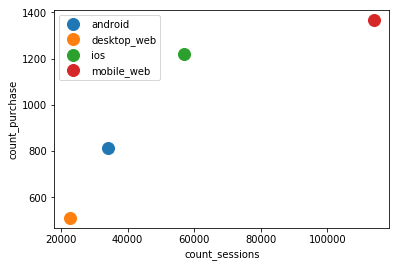

In [83]:
## Plotting purchases over sessions

import matplotlib.pyplot as plt

groups = by_device_conversion.groupby('device_type')
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.count_sessions, group.count_purchase, marker='o', linestyle='', ms=12, label=name)
ax.legend()
plt.xlabel("count_sessions")
plt.ylabel("count_purchase")
plt.show()

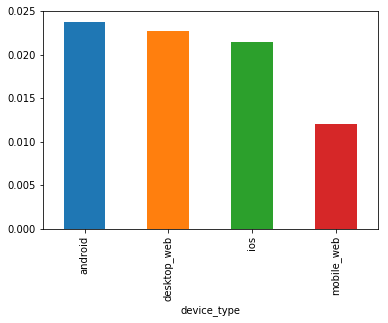

In [95]:
## Purchase Rate Per Page
(groups['count_purchase'].mean() / groups['count_sessions'].mean()).plot(kind="bar")

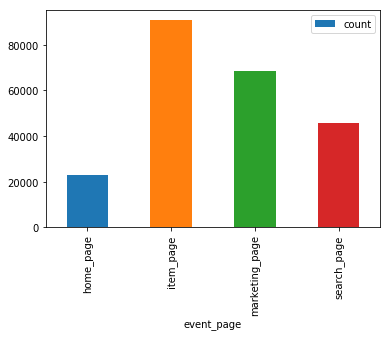

In [45]:
#Landing Events Per Page Type

landings = df.sort_values(['session_uuid','event_time'], ascending=True).groupby('session_uuid').first().groupby('event_page')['event_uuid'].count().reset_index(name='count')
landings.plot(x='event_page', y='count', kind='bar')

In [6]:
#Repeat Purchasers by Region

repeats = df.groupby('user_uuid')['event_type'].apply(lambda x: (x == 'purchase').sum()).reset_index(name='count')

#repeats.plot(x='event_page', y='count', kind='bar')

,user_uuid,count
0,0000759b-6767-43d9-bde9-51440e0788b8,0
1,00007f55-0f8e-46c7-89fb-2729034deb03,0
2,0000b2bf-0f18-4a1e-b5c6-2f16e45dd01d,0
3,0001d7ff-7619-410c-95dd-3df18ed305ac,0
4,000358ed-ab95-4812-8bd8-9d6544796c03,0
5,0003ac3a-c8ae-4912-a12c-8ff39650f8ed,0
6,000547c7-f2a0-44ad-92de-94c0ba0fafe6,0
7,000698bb-5d9a-4f27-a581-8e201375acf1,0
8,00086733-8282-4e9e-9e9e-1ca74b5144bd,0
9,000b3b12-2aa3-42dd-aa36-7909e06691a0,0


### Section 2 - Solution Summary

1) The student has identified device type and region as the actionable elements of their personas as a first step.  

2) The student has identified the item page is getting the most traffic and is the best opporunity to show traction in the short term.

3) The student has at least identified the fact that there is a large drop off in conversion for users on mobile_web as compared to other users.


## Section 3 - Generate Hypotheses and Recommended Next Step [STUDENT]

Now you're going to generate hypotheses based on your personas, journey, and risks & opportunities

Using the personas and journey steps identified above:


![screen shots of mock website icecreamsandwi.ch ](screenshots.png)

1) Find the best opportunity for your first set of hypotheses  
2) Generate hypotheses of what do do next  
3) Summarize your hypotheses and next best action for each  


## Section 3 - Generate Hypotheses and Recommended Next Step [SOLUTION]

![screen shots of mock website icecreamsandwi.ch ](screenshot_solution.png)

1) Student should be able to call out that they identified Mobile Web for All Users as the best first place to generate hypotheses.

2) Student should identify the lack of "Free Shipping" on mobile web as an opportunity 

3) Student should recommend an a/b experiment on mobile web.





